# Processing images with different thresholds

OpenCV has many different types of thresholds and thresholding methods. You can divide all the methods into two groups—global, where the same threshold value is used for all pixels, and adaptive, where the value of the threshold is pixel-dependent.

The approaches from the first group can be used through the `cv2.threshold` function, which, among other parameters, takes the threshold type (such as `cv2.THRESH_BINARY` and `cv.THRESH_BINARY_INV`). 

Adaptive thresholding methods are available through the `cv2.adaptiveThreshold` function. In adaptive approaches, each pixel has its own threshold, which depends on the surrounding pixel values. In the preceding code, we used the `cv2.ADAPTIVE_THRESH_MEAN_C` approach for threshold value estimation, which computes the mean value of the surrounding pixels and uses that value minus a user-specified bias (`10`, in our case) as a pixel-wise threshold.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: uint8
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
Populating the interactive namespace from numpy and matplotlib


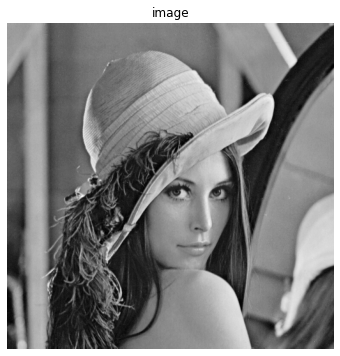

In [2]:
image = cv2.imread('data/Lena.png', 0)


#######################################################
print_image('Original','image',image,0,2,400,450)
plt.figure(figsize=(6,6))
%pylab inline
plt_view_image(plt,[["image",image]    ])

Threshold used == 200.0
------  Original-----------------    Shape(512, 512) image: uint8
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
------  threshold 200------------    Shape(512, 512) mask: uint8
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]


<Figure size 432x432 with 0 Axes>

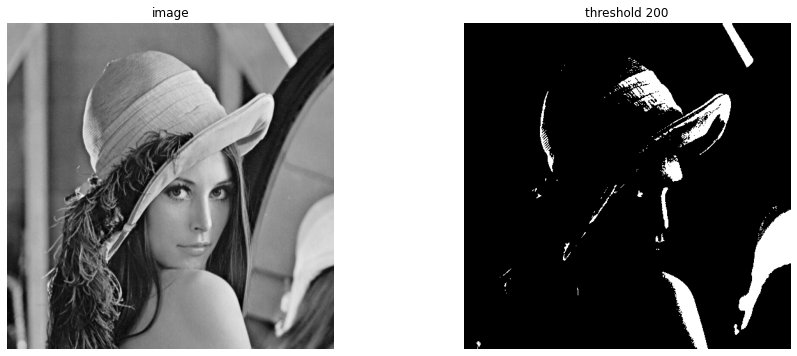

In [3]:
# OpenCV has many different types of thresholds and thresholding methods. 
# You can divide all the methods into two groups
# 1) global, where the same threshold value is used for all pixels, 
# 2) adaptive, where the value of the threshold is pixel-dependent.


# Apply a simple binary threshold
#CVAPI(double)  cvThreshold( const CvArr*  src, CvArr*  dst,
#                            double  threshold, double  max_value,
#                            int threshold_type );
#ret, threshold = cv2.threshold(im, 150, 200, 10)
#Здесь всё, что темнее, чем 150, заменяется на 10, а всё, что ярче, — на 200.
#max_value — максимальное значение (используется совместно с CV_THRESH_BINARY и CV_THRESH_BINARY_INV)
##define CV_THRESH_BINARY      0  /* value = value > threshold ? max_value : 0       */

thr, mask_threshold200 = cv2.threshold(image, 200, 1, cv2.THRESH_BINARY)
print('Threshold used ==',thr)


##############################################################
print_image('Original','image',image,0,2,400,450)
print_image('threshold 200','mask',mask_threshold200,0,2,400,450)
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image],
                    ["threshold 200",mask_threshold200]
                   ])

#print_image('mask','mask',np.where(mask > 0, np.uint8(255), np.uint8(0)), 0,1,0,512)
cv2.imshow('image, threshold 200', np.hstack([image,
                                              np.where(mask_threshold200 > 0, np.uint8(255), np.uint8(0))   
                                             ]))
cv2.waitKey()
cv2.destroyAllWindows()

------  Original-----------------    Shape(512, 512) image: uint8
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
------  threshold 200------------    Shape(512, 512) mask: uint8
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
------  Threshold ADAPTIVE MEAN--    Shape(512, 512) mask: uint8
[ 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 

<Figure size 1080x432 with 0 Axes>

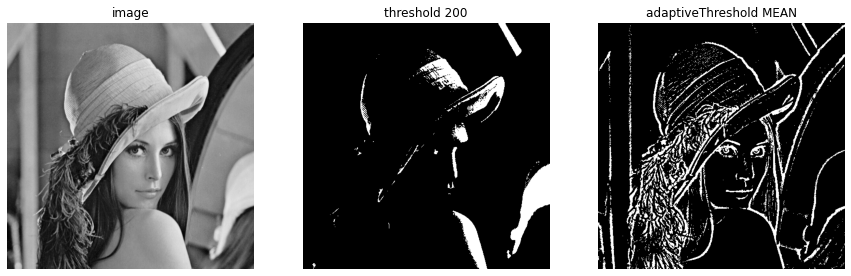

In [4]:
# Apply adaptive thresholding
#обычное пороговое преобразование никак не учитывает, что части объектов могут иметь различную яркость 
#из-за разности в освещённости. Это можно исправить если использовать адаптивное пороговое преобразование, 
#которое рассматривает значение не в одном пикселе, а в окрестности пикселя. 
#Это значение может быть просто средним значением пикселей окрестности(т.е. все пиксели равнозначны)(CV_ADAPTIVE_THRESH_MEAN_C),
#либо пиксели окрестности умножаются на весовой коэффициент (взвешиваются) в соответствии с функцией, 
#например с гауссовой функцией (CV_ADAPTIVE_THRESH_GAUSSIAN_C).

mask_ADAPTIVE_THRESH_MEAN = cv2.adaptiveThreshold(image, 255,
                                                  cv2.ADAPTIVE_THRESH_MEAN_C, 
                                                  cv2.THRESH_BINARY_INV, 11, 10)


#############################################################################
print_image('Original','image',image,0,2,400,450)
print_image('threshold 200','mask',mask_threshold200,0,2,400,450)
print_image('Threshold ADAPTIVE MEAN','mask',mask_ADAPTIVE_THRESH_MEAN,0,2,400,450)
plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["threshold 200",mask_threshold200],
                    ["adaptiveThreshold MEAN",mask_ADAPTIVE_THRESH_MEAN]
                   ])
cv2.imshow('before, binary threshold 200, adaptiveThreshold MEAN', 
           np.hstack([image,
                      np.where(mask_threshold200 > 0, np.uint8(255), np.uint8(0)), 
                      mask_ADAPTIVE_THRESH_MEAN 
                     ]))
cv2.waitKey()
cv2.destroyAllWindows()

------  Original-----------------    Shape(512, 512) image: uint8
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
[ 161 162 165 182 195 202 208 210 215 214 215 218 220 220 220 220 222 218 213 207 195 176 157 130 115 114 111 112 112 119 115 123 125 126 128 127 128 127 129 133 134 130 130 127 129 133 131 128 132 131 ]
------  threshold 200------------    Shape(512, 512) mask: uint8
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
------  Threshold ADAPTIVE MEAN--    Shape(512, 512) mask: uint8
[ 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 255 255 255 255 

<Figure size 1080x432 with 0 Axes>

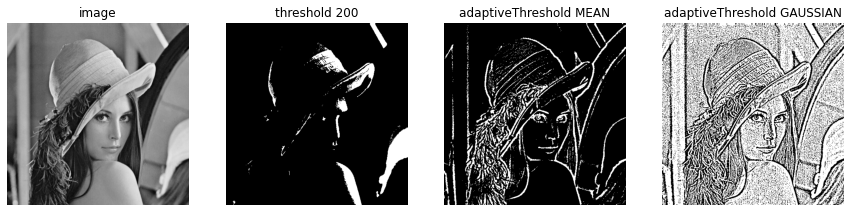

In [5]:
mask_ADAPTIVE_THRESH_GAUSSIAN = cv2.adaptiveThreshold(image,255,
                                                      cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                                      cv2.THRESH_BINARY,11,2)

#############################################################################
print_image('Original','image',image,0,2,400,450)
print_image('threshold 200','mask',mask_threshold200,0,2,400,450)
print_image('Threshold ADAPTIVE MEAN','mask',mask_ADAPTIVE_THRESH_MEAN,0,2,400,450)
print_image('Threshold ADAPTIVE GAUSSIAN','mask',mask_ADAPTIVE_THRESH_GAUSSIAN,0,2,400,450)
plt.figure(figsize=(15,6))
plt_view_image(plt,[["image",image],
                    ["threshold 200",mask_threshold200],
                    ["adaptiveThreshold MEAN",mask_ADAPTIVE_THRESH_MEAN],
                    ["adaptiveThreshold GAUSSIAN",mask_ADAPTIVE_THRESH_GAUSSIAN]
                   ])
cv2.imshow('binary threshold 200, adaptiveThreshold MEAN, GAUSSIAN', 
           np.hstack([np.where(mask_threshold200 > 0, np.uint8(255), np.uint8(0)), 
                      mask_ADAPTIVE_THRESH_MEAN,
                      mask_ADAPTIVE_THRESH_GAUSSIAN
                      ]))
cv2.waitKey()
cv2.destroyAllWindows()